# <center>동국블루칩 포트폴리오 최적화 서비스</center>

---

### 당신을 위한  포트폴리오를 받아보세요!

In [1]:
import ipywidgets as widgets
from ipywidgets import Layout

from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

import sys
mod = sys.modules[__name__]

In [2]:
from pulp import *
#from pypfopt.efficient_frontier import EfficientFrontier
#from pypfopt import risk_models
#from pypfopt import expected_returns
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import font_manager, rc
from matplotlib import style

In [4]:
font_name = font_manager.FontProperties(fname=".fonts/malgunsl.ttf").get_name()
rc('font',family=font_name)

In [5]:
#종목별 성능 불러오기
test_result=pd.read_csv("performance_87code.csv")

In [6]:
csv_name_list=["A000100_유한양행",
"A000120_대한통운",
"A000270_기아차",
"A000660_SK하이닉스",
"A000720_현대건설",
"A000810_삼성화재",
"A002790_아모레G",
"A003410_쌍용양회",
"A003490_대한항공",
"A003550_LG",
"A003670_포스코케미칼",
"A004020_현대제철",
"A004990_롯데지주",
"A005380_현대차",
"A005387_현대차2우B",
"A005490_POSCO",
"A005830_DB손해보험",
"A005930_삼성전자",
"A005935_삼성전자우",
"A005940_NH투자증권",
"A006280_녹십자",
"A006360_GS건설",
"A006400_삼성SDI",
"A006800_미래에셋대우",
"A007070_GS리테일",
"A008560_메리츠증권",
"A008770_호텔신라",
"A008930_한미사이언스",
"A009150_삼성전기",
"A009540_한국조선해양",
"A009830_한화솔루션",
"A010130_고려아연",
"A010140_삼성중공업",
"A010950_S-Oil",
"A011070_LG이노텍",
"A011170_롯데케미칼",
"A011200_HMM",
"A011780_금호석유",
"A011790_SKC",
"A012330_현대모비스",
"A012510_더존비즈온",
"A012750_에스원",
"A015760_한국전력",
"A016360_삼성증권",
"A017670_SK텔레콤",
"A018260_삼성에스디에스",
"A018880_한온시스템",
#"A019170_신풍제약",              
"A021240_코웨이",
"A023530_롯데쇼핑",
"A024110_기업은행",
"A026960_동서",
"A028260_삼성물산",
"A028670_팬오션",
"A029780_삼성카드",
"A030200_KT",
"A032640_LG유플러스",
"A032830_삼성생명",
"A033780_KT_G",
"A034020_두산중공업",
"A034220_LG디스플레이",
"A034730_SK",
"A035250_강원랜드",
"A035420_NAVER",
"A035720_카카오",
"A036460_한국가스공사",
"A036570_엔씨소프트",
"A039490_키움증권",
"A047810_한국항공우주",
"A051900_LG생활건강",
"A051910_LG화학",
"A055550_신한지주",
"A066570_LG전자",
"A068270_셀트리온",
"A071050_한국금융지주",
"A078930_GS",
"A086280_현대글로비스",
"A086790_하나금융지주",
"A090430_아모레퍼시픽",
"A096770_SK이노베이션",
"A097950_CJ제일제당",
"A105560_KB금융",
"A128940_한미약품",
"A139480_이마트",
"A161390_한국타이어앤테크놀로지",
"A180640_한진칼",
"A204320_만도"]


csv_list = []
for i in range(len(csv_name_list)):    
    csv_list.append(csv_name_list[i][:7])
    csv_name_list[i] = csv_name_list[i][1:]


In [7]:
name = []
#종목별 예측 결과 불러오기
for i in range(len(test_result)):
    if test_result["result"][i]=="N": #성능이 엔비트가 더 좋을때 엔비트 csv 불러옴
        name.append(str(i))
        name[i]=pd.read_csv("최종/"+test_result['code'][i]+"n_beats_prediction_(3200, 800).csv")
        name[i].Date=pd.to_datetime(name[i].Date,format='%Y-%m-%d %H:%M:%S')
        name[i]={'Date':name[i]['Date'][-791:], test_result['code'][i]:name[i]['예측 시가'][-791:]}
        #예측된 Open 소수점 수정
        name[i][test_result['code'][i]]=name[i][test_result['code'][i]].round()
        name[i]=pd.DataFrame(name[i])

        name[i]=name[i].reset_index(drop=True)
        name[i]['time_idx']=name[i].index
    if test_result["result"][i]=="LGBM": #성능이 LGBM이 더 좋을때 LGBM csv 불러옴
        name.append(str(i))
        name[i]=pd.read_csv("lgbm/"+test_result['code'][i]+"_prediction_REAL1.csv") #lgbm csv이름이 다달라서,,,,일단 예시로 하나만 불러옴 
        name[i].Date=pd.to_datetime(name[i].Date,format='%Y-%m-%d %H:%M:%S')
        name[i]=name[i][-793:-2]
        name[i]={'Date':name[i]['Date'], test_result['code'][i]:name[i]['예측 시가']}
        #예측된 Open 소수점 수정
        name[i][test_result['code'][i]]=name[i][test_result['code'][i]].round()
        name[i]=pd.DataFrame(name[i])

        name[i]=name[i].reset_index(drop=True)
        name[i]['time_idx']=name[i].index
        


In [8]:
####예측 정확도 중점
score_smape=[]
for i in range(len(test_result)):
    if test_result['SMAPE'][i] <= 0.05:
        score_smape.append(10)
    elif test_result['SMAPE'][i] <= 0.1:
        score_smape.append(8)
    elif test_result['SMAPE'][i] <= 0.15:
        score_smape.append(6)
    elif test_result['SMAPE'][i] <= 0.20:
        score_smape.append(4)
    elif test_result['SMAPE'][i] <= 0.25:
        score_smape.append(2)
    else:
        score_smape.append(0)
        
score_mase=[]
for i in range(len(test_result)):
    if test_result['MASE'][i] <= 15:
        score_mase.append(10)
    elif test_result['MASE'][i] <= 20:
        score_mase.append(8)
    elif test_result['MASE'][i] <= 25:
        score_mase.append(6)
    elif test_result['MASE'][i] <= 30:
        score_mase.append(4)
    elif test_result['MASE'][i] <= 35:
        score_mase.append(2)
    else:
        score_mase.append(0)
     

In [9]:
def optimization_final(seed, num,min_value_index_list,max_value_index_list,min_value_list, max_value_list, profit,money): # 수익률 중점
    portfolio_num = num #추천 종목 수 
    prob = LpProblem("The_Optimization_Problem_1", LpMaximize)
    sellprice = dict(zip(csv_list, min_value_list))
    buyprice = dict(zip(csv_list, max_value_list))
    IntShares = LpVariable.dicts('IntShares', csv_list, lowBound=0, cat='Integer')

    # 종목별 몇 주씩? 최소 0, 최대 X  # Initialize integer variables, constrain to 10 maximum shares
    BinTicker = LpVariable.dicts('BinTicker', csv_list, cat='Binary')  # Initialize binary variables
    
    
    prob += lpSum(IntShares[i] * (buyprice[i]-sellprice[i]) for i in csv_list)  # Objective Function

    prob += lpSum([IntShares[i] * sellprice[i] for i in csv_list]) <= seed, 'Budget (500000)'
    prob += lpSum([BinTicker[i] for i in csv_list]) == portfolio_num, 'Min Tickers (5)'


    for i in csv_list:
        prob += (IntShares[i] - ((9999 * BinTicker[i]))) <= 0 #여기!!!!!!!!!!!!!!!!!!!!!!!!
        prob += (IntShares[i] - (.5 * BinTicker[i])) >= 0
        prob += (IntShares[i] * sellprice[i] ) <= lpSum([IntShares[i] * sellprice[i] for i in csv_list])  *0.3 #상한선
        prob.writeLP("OptimizationModel1.lp")
        prob.solve()
    

    sum = 0
    buy = 0
    left_coin=seed


    num_list=[]
    name_list=[]
    for v in prob.variables()[-86:]:
        num_list.append(v.varValue)
        name_list.append(v.name)
    for i in range(len(csv_list)):
        if num_list[i] != 0:
            buy += min_value_list[i]*num_list[i]
            sum += profit[i]*num_list[i]
            left_coin -= min_value_list[i]*num_list[i]    

    port_profit=[]
    
    for i in range(len(name[0])):#791
        profit_sum = 0
        for k in range(len(csv_list)): #87
            if num_list[k]!= 0: 
                profit_sum += money[k][i]*num_list[k]
        port_profit.append(int(profit_sum))
        
    DF_profit = {'Date':name[0]['Date'],'profit':port_profit}
    DF_profit = pd.DataFrame(DF_profit)
    print(".")
    print(".")
    print(".")
    print("< 추천 포트폴리오 >")
    print("")
    print("")  
       
    pie_stock_list=[]
    pie_ratio_list=[]

    for i in range(len(csv_list)):
        if num_list[i] != 0:
            pie_stock_list.append(csv_name_list[i])
            pie_ratio_list.append(min_value_list[i]*num_list[i]/buy)

    plt.rcParams['figure.figsize'] = [8, 6]
    wedgeprops={'width':0.7, 'edgecolor':'w','linewidth':5}
    colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','#a293c1','#ffbb99','#99fff5','#99ceff','#9e9e9e','#7fb849']
    plt.pie(pie_ratio_list,labels=pie_stock_list,textprops={'fontsize': 14},autopct="%d%%",colors=colors,wedgeprops=wedgeprops,normalize = True)
    plt.title('포트폴리오 구성 비율', fontsize=20)
    
    plt.show()
    print("-----------------------------------")
    print("투자금\t\t",int(seed),"원")
    print("매수금\t\t",int(buy),"원")
    print("총 수익\t\t",int(sum),"원")
    print("총 수익률\t",round(int(sum)/int(buy) * 100,3)," %")
    print("남은 금액\t",int(left_coin),"원")
    print("-----------------------------------")

    for i in range(len(csv_list)):
        if num_list[i] != 0:
            print("< "+csv_name_list[i]+" 매수량:   "+str(int(num_list[i]))+"주 >")
            print("매수\t\t",name[i]['Date'][min_value_index_list[i]])
            print("매수 가격\t",int(min_value_list[i]),"원")
            print("매도\t\t",name[i]['Date'][max_value_index_list[i]])
            print("매도 가격\t",int(max_value_list[i]),"원")
            print("주당 수익\t",int(profit[i]),"원")
            print("종목 수익\t",int(profit[i]*num_list[i]),"원")
            #print("비율",min_value_list[i]*num_list[i]/buy)
            print("")
            
    
    show_widgets(DF_profit) 

In [10]:
def optimization_score(seed , num,min_value_index_list,max_value_index_list,min_value_list, max_value_list, profit,money): #정확도 중점
    portfolio_num = num #추천 종목 수 

    prob = LpProblem("The_Optimization_Problem_2", LpMaximize)
    sellprice = dict(zip(csv_list, min_value_list))
    buyprice = dict(zip(csv_list, max_value_list))
    Score_smape = dict(zip(csv_list, score_smape))
    Score_mase = dict(zip(csv_list, score_mase))
    IntShares = LpVariable.dicts('IntShares', csv_list, lowBound=0, cat='Integer')

    # 종목별 몇 주씩? 최소 0, 최대 X  # Initialize integer variables, constrain to 10 maximum shares
    BinTicker = LpVariable.dicts('BinTicker', csv_list, cat='Binary')  # Initialize binary variables
    prob += lpSum(IntShares[i] * (Score_smape[i] + Score_mase[i]) * (buyprice[i]-sellprice[i]) for i in csv_list)  # Objective Function

    prob += lpSum([IntShares[i] * sellprice[i] for i in csv_list]) <= seed, 'Budget (500000)'
    prob += lpSum([BinTicker[i] for i in csv_list]) == portfolio_num, 'Min Tickers (5)'


    for i in csv_list:
        prob += (IntShares[i] - ((9999 * BinTicker[i]))) <= 0 #여기!!!!!!!!!!!!!!!!!!!!!!!!
        prob += (IntShares[i] - (.5 * BinTicker[i])) >= 0
        prob += (IntShares[i] * sellprice[i] ) <= lpSum([IntShares[i] * sellprice[i] for i in csv_list])  *0.3
        prob.writeLP("OptimizationModel2.lp")
        prob.solve()
    

    sum = 0
    buy = 0
    left_coin=seed


    num_list=[]
    name_list=[]
    for v in prob.variables()[-86:]:
        num_list.append(v.varValue)
        name_list.append(v.name)

    for i in range(len(csv_list)):
        if num_list[i] != 0:
            buy += min_value_list[i]*num_list[i]
            sum += profit[i]*num_list[i]
            left_coin -= min_value_list[i]*num_list[i]

    port_profit=[]
    
    for i in range(len(name[0])):#791
        profit_sum = 0
        for k in range(len(csv_list)): #87
            if num_list[k]!= 0: 
                profit_sum += money[k][i]*num_list[k]
        port_profit.append(int(profit_sum))
        
    DF_profit = {'Date':name[0]['Date'],'profit':port_profit}
    DF_profit = pd.DataFrame(DF_profit)
    print(".")
    print(".")
    print(".")
    print("< 추천 포트폴리오 >")
    print("")
    print("")  
    
    
    pie_stock_list=[]
    pie_ratio_list=[]

    for i in range(len(csv_list)):
        if num_list[i] != 0:
            pie_stock_list.append(csv_name_list[i])
            pie_ratio_list.append(min_value_list[i]*num_list[i]/buy)
    plt.rcParams['figure.figsize'] = [8, 6]
    wedgeprops={'width':0.7, 'edgecolor':'w','linewidth':5}
    colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','#a293c1','#ffbb99','#99fff5','#99ceff','#9e9e9e','#7fb849']
    plt.pie(pie_ratio_list,labels=pie_stock_list,textprops={'fontsize': 14},autopct="%d%%",colors=colors,wedgeprops=wedgeprops,normalize = True)
    plt.title('포트폴리오 구성 비율', fontsize=20)

    plt.show()
    print("-----------------------------------")
    print("투자금\t\t",int(seed),"원")
    print("매수금\t\t",int(buy),"원")
    print("총 수익\t\t",int(sum),"원")
    print("총 수익률\t",round(int(sum)/int(buy) * 100,3)," %")
    print("남은 금액\t",int(left_coin),"원")
    print("-----------------------------------")

    for i in range(len(csv_list)):
        if num_list[i] != 0:
            print("< "+csv_name_list[i]+" 매수량:   "+str(int(num_list[i]))+"주 >")
            print("매수\t\t",name[i]['Date'][min_value_index_list[i]])
            print("매수 가격\t",int(min_value_list[i]),"원")
            print("매도\t\t",name[i]['Date'][max_value_index_list[i]])
            print("매도 가격\t",int(max_value_list[i]),"원")
            print("주당 수익\t",int(profit[i]),"원")
            print("종목 수익\t",int(profit[i]*num_list[i]),"원")
            #print("비율",min_value_list[i]*num_list[i]/buy)
            print("")
    
    show_widgets(DF_profit) 
    
    

In [11]:
def show_widgets(DF): 
    button = widgets.Button(description='수익 그래프 확인',                         
                            disabled=False,
                            button_style='', # 'success', 'info', 'warning', 'danger' or ''
                            tooltip='Click me'
                           )
    output = widgets.Output()
    plt.figure(figsize=(8,6))
    plt.xticks(rotation=45)
    ax = plt.gca()
    def on_click(b: widgets.Button) -> None: 
        # 전에 그렸던 내용을 클리어한다. 
        ax.clear() 
        # 다시 그린다. 
        ax.plot(DF['Date'],DF['profit']/10000, color='red') 
        ax.set_ylim([0, max(DF['profit'])/10000])
        ax.set_title("Investment Earnings")
        ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%d 만원'))
        # Output 으로 출력한다. 
        with output: 
            output.clear_output(wait=True) 
            display(ax.figure)
    button.on_click(on_click) 
    display(button, output)
    plt.close()
    #button.click()

In [12]:
seed_input = 0
print("1. 투자 금액을 입력하세요.(단위:만)")
widget_seed = widgets.BoundedIntText(
    value=50,
    min=0,
    max=999999999999,
    step=1,
    description='투자 금액 :',
)


value_lbl = widgets.Label()
seed_input = value_lbl
transform = lambda x: str(x)
widgets.dlink((widget_seed, 'value'), (value_lbl, 'value'), transform)

display(widget_seed)
#display(widget_seed, widgets.HBox([widgets.Label("투자 금액 :"), value_lbl]) )

1. 투자 금액을 입력하세요.(단위:만)


BoundedIntText(value=50, description='투자 금액 :', max=999999999999)

In [13]:
jongmoc_num_input = 5
print("2. 투자 종목 수를 입력하세요.(최대 10개)")
widget_number = widgets.BoundedIntText(
    value=5,
    min=0,
    max=10,
    step=1,
    description='투자 종목 수 :',
)

value_lbl2 = widgets.Label()
jongmoc_num_input = value_lbl2
transform = lambda x: str(x)
widgets.dlink((widget_number, 'value'), (value_lbl2, 'value'), transform)

display(widget_number)
#display(widget_number, widgets.HBox([widgets.Label("Current Value:"), value_lbl2]) )


2. 투자 종목 수를 입력하세요.(최대 10개)


BoundedIntText(value=5, description='투자 종목 수 :', max=10)

In [14]:
print("3. 포트폴리오 구성 방식을 선택하세요.")
type_Dropdown = widgets.Dropdown(
    options=['수익률 중점', '정확도 중점'],
    value='수익률 중점',
    description='구성 방식 :',
    disabled=False,
)
value_lbl3 = widgets.Label()
type_input = value_lbl3
transform = lambda x: str(x)
widgets.dlink((type_Dropdown, 'value'), (value_lbl3, 'value'), transform)

display(type_Dropdown)

3. 포트폴리오 구성 방식을 선택하세요.


Dropdown(description='구성 방식 :', options=('수익률 중점', '정확도 중점'), value='수익률 중점')

In [15]:
print("4. 투자 종료일을 선택하세요.최대 3개월동안 투자 가능합니다")
end_date_index =790
date_Dropdown = widgets.Dropdown(
    options=name[0]['Date'],
    value=name[0]['Date'][790],
    description='투자 종료일 :',
    disabled=False,
)
value_lbl4 = widgets.Label()
transform = lambda x: str(x)
widgets.dlink((date_Dropdown, 'value'), (value_lbl4, 'value'), transform)
date_input = value_lbl4
        
display(date_Dropdown)

4. 투자 종료일을 선택하세요.최대 3개월동안 투자 가능합니다


Dropdown(description='투자 종료일 :', index=790, options=(Timestamp('2020-12-21 09:30:00'), Timestamp('2020-12-21 1…

In [16]:
def cut_date():
    for i in range(len(name[1])):
        if date_input.value==str(name[1]['Date'][i]):
            end_date_index = i
    for i in range(len(csv_list)):
        name[i]=name[i][:end_date_index+1]
    calcul_profit()

In [17]:
min_value_list=[]
min_value_index_list=[]
max_value_list=[]
max_value_index_list=[]
profit = []
money = [[0 for col in range(0)] for row in range(87)]
def calcul_profit():
    #최소 시가 계산, 이건 최소값 제일 옛날 인덱스 저장
    min_value_list=[]
    min_value_index_list=[]
    min_i = 0
    for i in range(len(csv_list)):
        min_value_list.append(min(name[i][csv_list[i]]))
        for j in range(791):
            if name[i][csv_list[i]][j]==min(name[i][csv_list[i]]):
                min_value_index_list.append(j)
                break

    #최대 시가 계산 최대값중에 제일 최근 인덱스 저장
    max_value_list=[]
    max_value_index_list=[]

    for i in range(len(csv_list)):
        name[i]=name[i].sort_values(by=[csv_list[i]], axis=0)
        max_list_fake = name[i].copy()
        max_list_fake=max_list_fake.reset_index(drop=True)
        for k in range(len(name[i])):
            if min_value_index_list[i]<max_list_fake.loc[k].time_idx:
                max_value_index=max_list_fake.loc[k].time_idx

        max_value_list.append(name[i][csv_list[i]][max_value_index])
        max_value_index_list.append(max_value_index)

    profit = []
    for i in range(len(csv_list)):
        profit.append(max_value_list[i]-min_value_list[i])

    DF = {'min_value_index_list':min_value_index_list,'max_value_index_list':max_value_index_list,'min_value_list':min_value_list,'max_value_list':max_value_list,'profit':profit}
    DF = pd.DataFrame(DF)
    for i in range(len(csv_list)):
        name[i]=name[i].sort_values(by=['time_idx'], axis=0)
 
    money = [[0 for col in range(0)] for row in range(87)]
    for k in range(len(csv_list)):
        for i in range(len(name[k])):
            if i <= min_value_index_list[k]:
                money[k].append(0)
            elif i <= max_value_index_list[k]:
                money[k].append(name[k][csv_list[k]][i]-name[k][csv_list[k]][min_value_index_list[k]])
            else:
                money[k].append(name[k][csv_list[k]][max_value_index_list[k]]-name[k][csv_list[k]][min_value_index_list[k]])
    
    
    if type_input.value == '수익률 중점':
        optimization_final(int(seed_input.value)*10000,int(jongmoc_num_input.value),min_value_index_list,max_value_index_list,min_value_list, max_value_list, profit,money )
    if type_input.value == '정확도 중점':
        optimization_score(int(seed_input.value)*10000,int(jongmoc_num_input.value),min_value_index_list,max_value_index_list,min_value_list, max_value_list, profit,money )            

                
                
                
                
    return min_value_index_list,max_value_index_list,min_value_list, max_value_list, profit,money

In [18]:

def calcul_money():
    money = [[0 for col in range(0)] for row in range(87)]
    for k in range(len(csv_list)):
        for i in range(len(name[k])):
            if i <= min_value_index_list[k]:
                money[k].append(0)
            elif i <= max_value_index_list[k]:
                money[k].append(name[k][csv_list[k]][i]-name[k][csv_list[k]][min_value_index_list[k]])
            else:
                money[k].append(name[k][csv_list[k]][max_value_index_list[k]]-name[k][csv_list[k]][min_value_index_list[k]])

Button(description='포트폴리오 제작', icon='check', style=ButtonStyle(), tooltip='Click me')

Output()

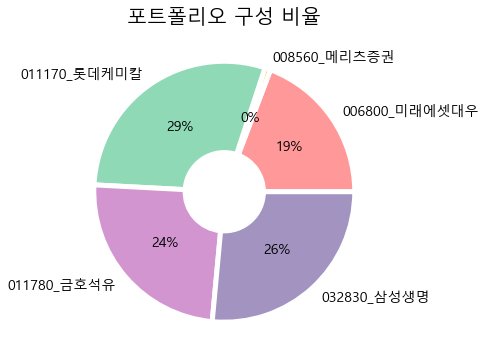

In [19]:
button = widgets.Button(
    description='포트폴리오 제작',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
output = widgets.Output()

display(button, output)

def on_button_clicked(button):
    with output:
        print("고객님의 포트폴리오를 구성 중 입니다. 약 1~3분 기다려주세요.")
        cut_date()
        
button.on_click(on_button_clicked)        